In [1]:
import pickle
import mgzip
import numpy as np
import matplotlib.pyplot as plt

In [4]:
with mgzip.open('../fullE_big_noE_predictions/pred_converted_100GeV_debug_35.bin.gz') as data:
    predictions = pickle.load(data)

# index1: event in file
# index2: 0: features, 1: truth, 2: predictions

predictions[15][0].keys()

dict_keys(['recHitEnergy', 'recHitEta', 'recHitID', 'recHitTheta', 'recHitR', 'recHitX', 'recHitY', 'recHitZ', 'recHitTime', 'recHitHitR', 'recHitXY'])

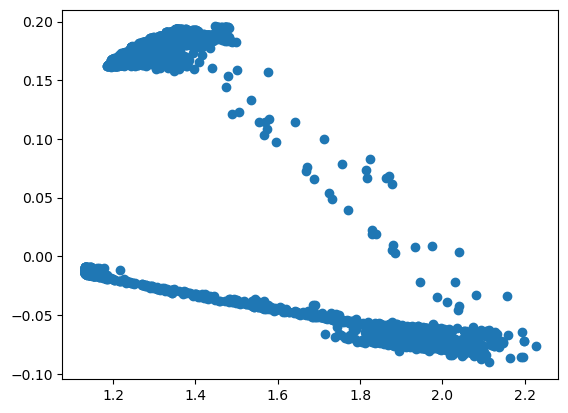

In [3]:
predictions[3][2]['pred_pos']
plt.scatter(predictions[10][2]['pred_pos'][:,0], predictions[10][2]['pred_pos'][:,1])

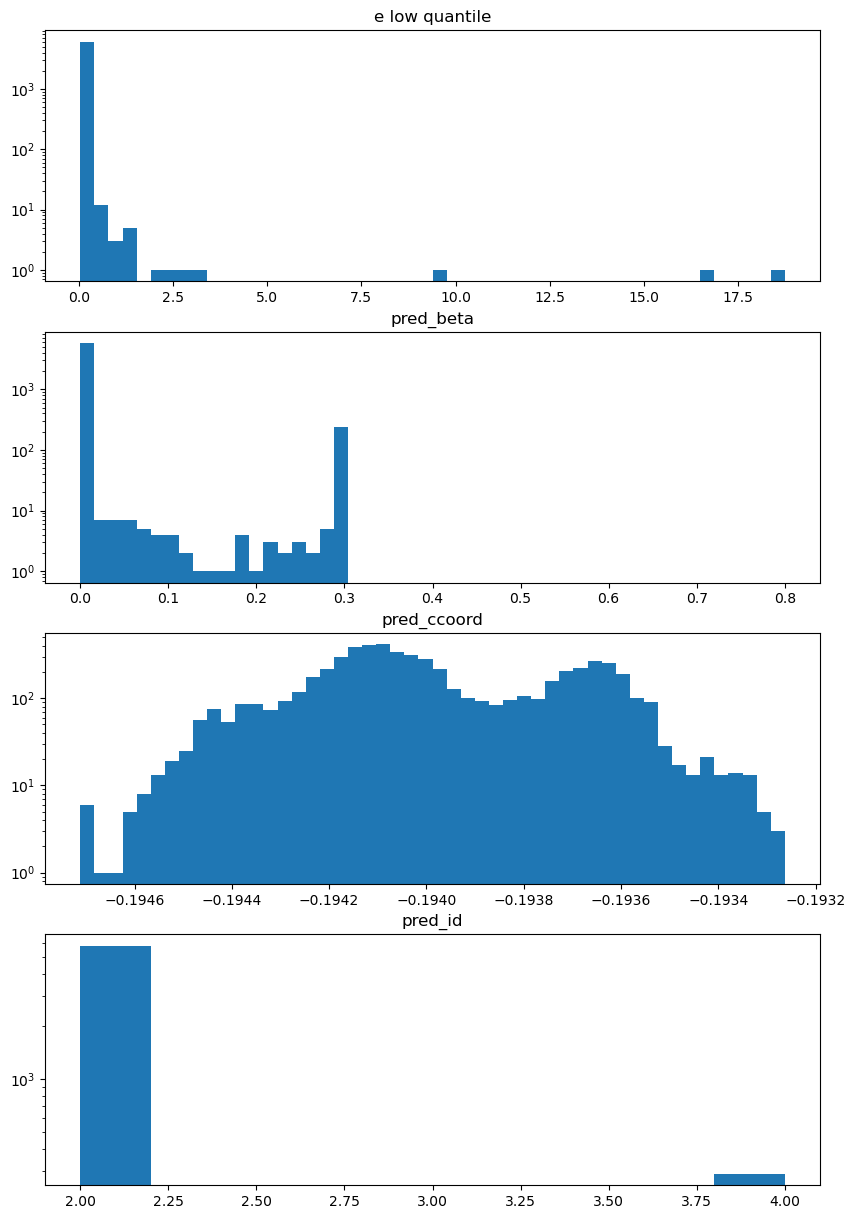

In [11]:
for ievt, event in enumerate(predictions):
    fig, axs = plt.subplots(4, figsize=(10,15))
    axs[0].hist(event[2]['rechit_energy'], bins=50)
    axs[0].set_yscale('log')
    axs[0].set_title('rechit energy')

    axs[1].hist(event[2]['pred_beta'], bins=50, range=(0.,0.8))
    axs[1].set_yscale('log')
    axs[1].set_title('pred_beta')

    axs[2].hist(event[2]['pred_ccoords'].max(axis=-1), bins=50)
    axs[2].set_yscale('log')
    axs[2].set_title('pred_ccoord')

    axs[3].hist(event[2]['pred_id'].argmax(axis=1))  
    axs[3].set_yscale('log')
    axs[3].set_title('pred_id')

    break


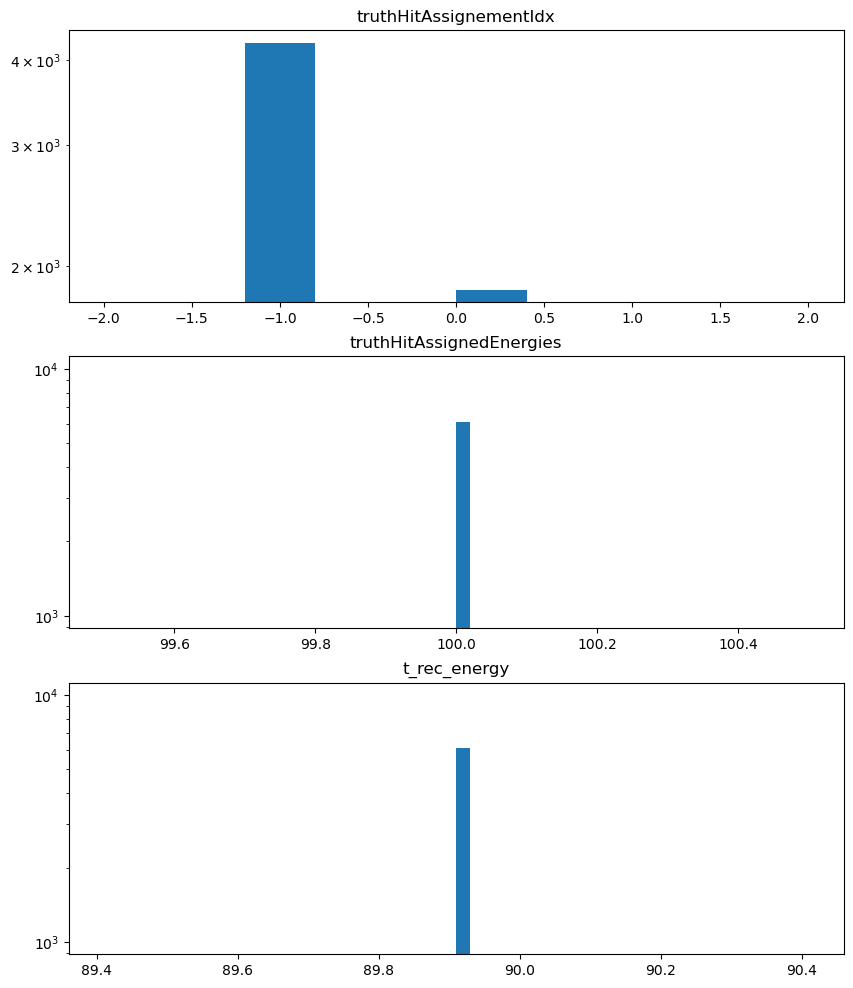

In [8]:
for ievt, event in enumerate(predictions):
    fig, axs = plt.subplots(3, figsize=(10,12))
    axs[0].hist(event[1]['truthHitAssignementIdx'],range=(-2.,2.))
    axs[0].set_yscale('log')
    axs[0].set_title('truthHitAssignementIdx')

    axs[1].hist(event[1]['truthHitAssignedEnergies'], bins=50)
    axs[1].set_yscale('log')
    axs[1].set_title('truthHitAssignedEnergies')

    axs[2].hist(event[1]['t_rec_energy'], bins=50)
    axs[2].set_yscale('log')
    axs[2].set_title('t_rec_energy')

    break

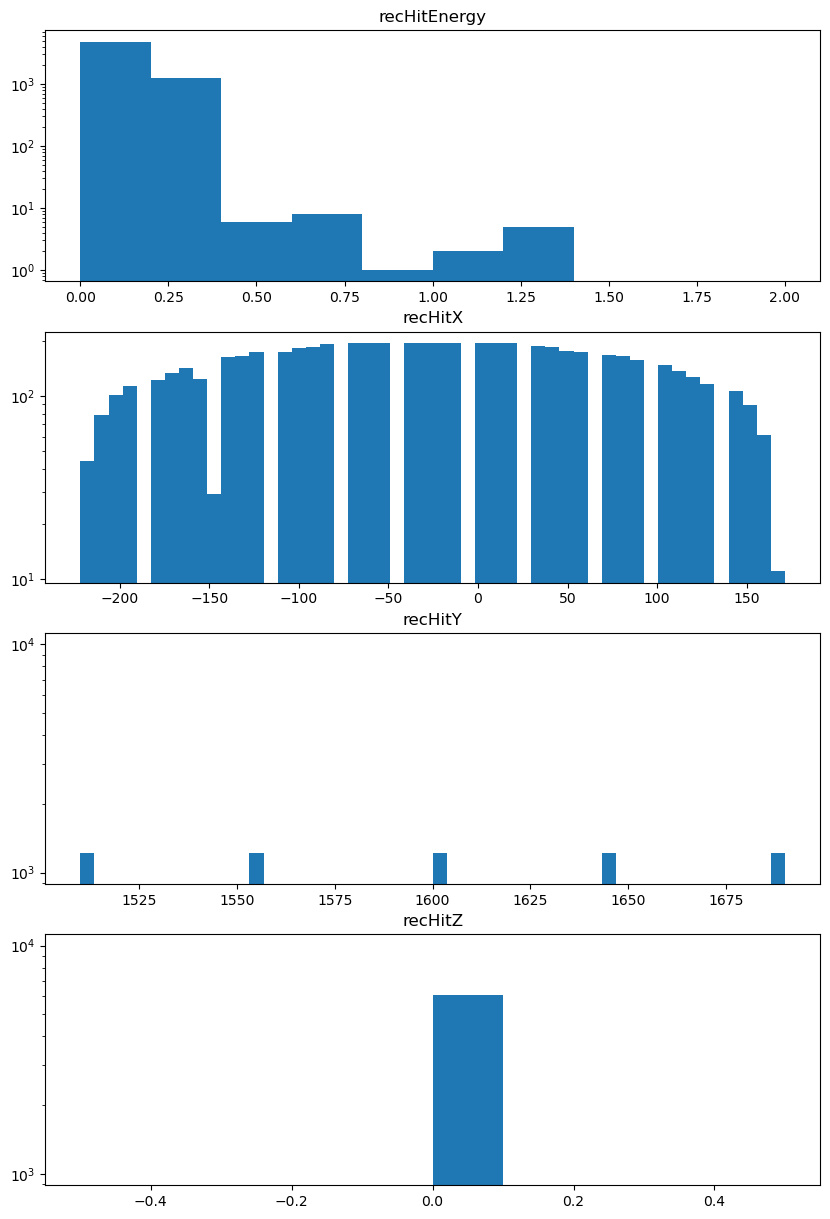

In [9]:
for ievt, event in enumerate(predictions):
    fig, axs = plt.subplots(4, figsize=(10,15))
    axs[0].hist(event[0]['recHitEnergy'], range=(0.,2.))
    axs[0].set_yscale('log')
    axs[0].set_title('recHitEnergy')

    axs[1].hist(event[0]['recHitX'], bins=50)
    axs[1].set_yscale('log')
    axs[1].set_title('recHitX')

    axs[2].hist(event[0]['recHitY'], bins=50)
    axs[2].set_yscale('log')
    axs[2].set_title('recHitY')

    axs[3].hist(event[0]['recHitZ'].argmax(axis=1))  
    axs[3].set_yscale('log')
    axs[3].set_title('recHitZ')

    break

In [10]:
def plot3d(pox,poy,poz, predID):
    import plotly.graph_objects as go
    import numpy as np
    from plotly.subplots import make_subplots
    fig = make_subplots(rows=1, cols=1, specs=[[{'is_3d': True}]])
    fig.add_trace(go.Scatter3d(x=pox, y=poy, z=poz, mode='markers', marker=dict(
        size=4, 
        symbol='circle', 
        color=predID, 
        colorscale='Viridis', 
        opacity=0.5,
        colorbar=dict(thickness=20, title='PID'),
        )), 1, 1)
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.update_traces(marker=dict(line=dict(width=0)))
    # edit axis limits
    fig.update_layout(scene=dict(xaxis=dict(range=[-200,200],),
                                yaxis=dict(range=[-200,200],),
                                zaxis=dict(range=[-200,200],),),
                    width=700,
                    margin=dict(r=20, l=10, b=10, t=10))
    fig.show()

def calculate_cluster_distances(pred_beta, pred_dist, ccoords, t_d=1.):
    beta_max, beta_max_id= *[pred_beta.max()], *[pred_beta.argmax()]
    beta_max_coords = ccoords[beta_max_id]
    return np.sqrt((ccoords[:,0]-np.ones_like(ccoords[:,0])*beta_max_coords[0])**2 + 
                   (ccoords[:,1]-np.ones_like(ccoords[:,0])*beta_max_coords[1])**2 + 
                   (ccoords[:,2]-np.ones_like(ccoords[:,0])*beta_max_coords[2])**2)

x = predictions[0][0]['recHitX']
y = predictions[0][0]['recHitY']
z = predictions[0][0]['recHitZ']
pred_beta = predictions[0][2]['pred_beta']
plot3d(x, y, z, pred_beta)

In [9]:
z

array([[-193.337],
       [-193.337],
       [-193.337],
       ...,
       [ 193.337],
       [ 193.337],
       [ 193.337]], dtype=float32)